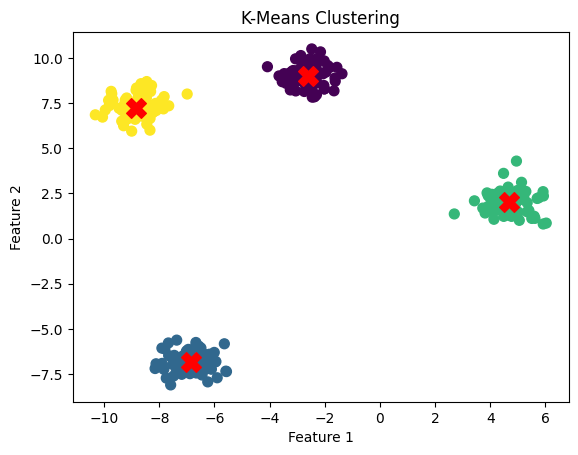

In [ ]:
# un supervised learning

# K-Means Clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


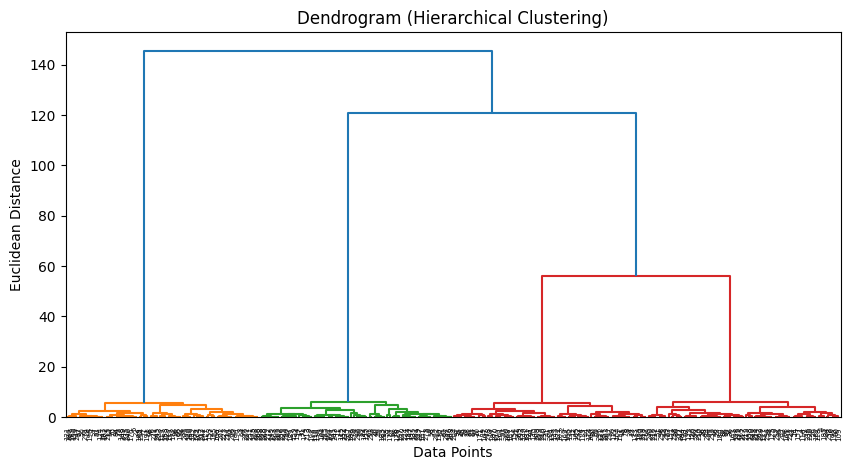

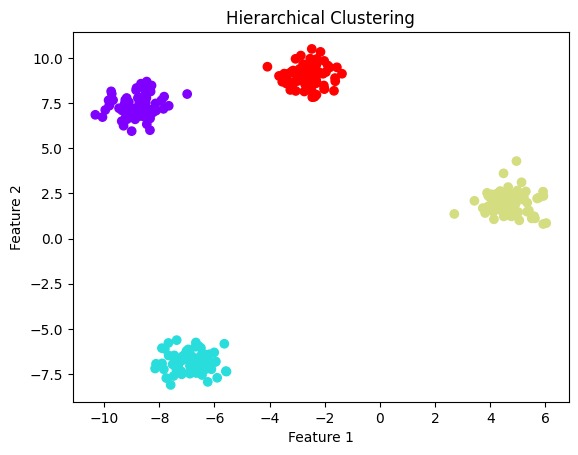

In [ ]:
# Hierarchical Clustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Dendrogram for visualizing linkage
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram (Hierarchical Clustering)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

# Agglomerative Clustering
# Changed 'affinity' to 'metric' as 'affinity' was removed in newer versions of scikit-learn
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Plot clusters
plt.scatter(X[:, 0], X[:, 1], c=y_hc, cmap='rainbow')
plt.title("Hierarchical Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

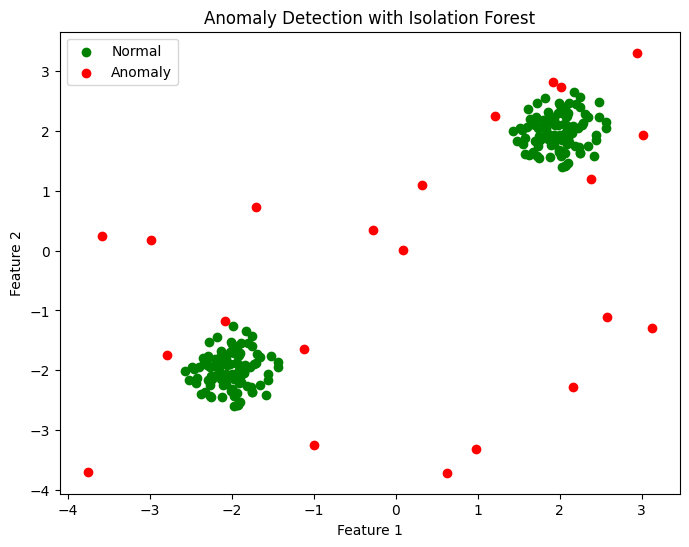

In [ ]:
# Anomaly Detection using Isolation Forest
# Anomaly Detection (also called outlier detection) is the process of identifying
# data points that deviate significantly from the normal pattern in a dataset.
# Anomalies = rare, unexpected, or suspicious observations

# Types of Anomalies

# Point Anomalies
# A single data point is far from the norm
# E.g., One huge transaction in a day of small purchases.

# Contextual Anomalies
# A value is abnormal in a given context
# E.g., 25°C is normal in summer, but abnormal in winter.

# Collective Anomalies
# A group of data points are abnormal together
# E.g., Multiple failed login attempts in a short time.




# Popular Anomaly Detection Algorithms

# 1. Isolation Forest (Great for high-dimensional data)
# Works by isolating data points using random decision trees.

# Anomalies are isolated faster because they're few and different.

# ✅ Efficient and scalable.

# 2. One-Class SVM
# Learns the boundary of "normal" data in feature space.

# Classifies new points as inside (normal) or outside (anomaly).

# ❌ Sensitive to noise and high dimensionality.

# 3. Autoencoders (Neural Networks)

# Learns to compress and reconstruct data.

# High reconstruction error → Anomaly.

# ✅ Great for complex, nonlinear datasets.



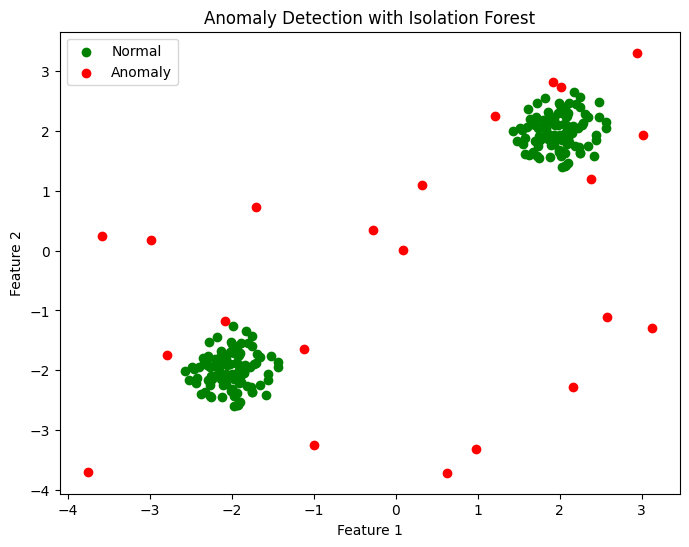

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate synthetic normal data
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]

# Add some anomalies
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X_all = np.r_[X_train, X_outliers]

# Train Isolation Forest
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_all)

# Predict anomalies
y_pred = model.predict(X_all)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(X_all[y_pred == 1, 0], X_all[y_pred == 1, 1], c='green', label="Normal")
plt.scatter(X_all[y_pred == -1, 0], X_all[y_pred == -1, 1], c='red', label="Anomaly")
plt.title("Anomaly Detection with Isolation Forest")
plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [ ]:
# Customer segmentation using Mall Customers
# Customer segmentation using the Mall Customers dataset typically involves
# clustering techniques, especially K-Means or Hierarchical Clustering, to group
# customers based on spending behavior, income, and age.

# Dataset Features
# The Mall Customers dataset includes:

# CustomerID

# Gender

# Age

# Annual Income (k$)

# Spending Score (1–100)



Mounted at /content/drive
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


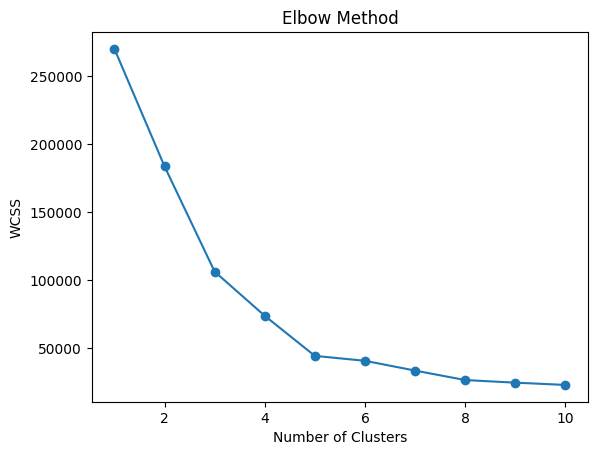

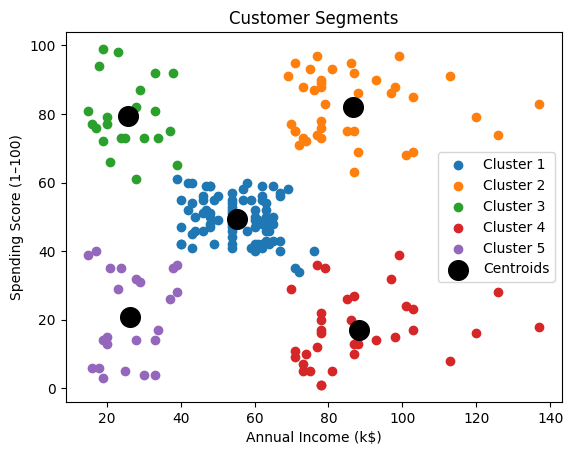

In [1]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from google.colab import drive
drive.mount("/content/drive")

# Step 2: Load dataset
data = pd.read_csv("/content/drive/MyDrive/Data/Mall_Customers.csv")
print(data.head())

# Step 3: Select features
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]

# Step 4: Elbow Method to find optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

# Step 5: Apply K-Means with optimal k (e.g., 5)
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 6: Visualize clusters
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1], label="Cluster 1")
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1], label="Cluster 2")
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1], label="Cluster 3")
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1], label="Cluster 4")
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1], label="Cluster 5")

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.show()
